![scientisst-notebooks_top-banner](https://raw.githubusercontent.com/scientisst/notebooks/59632d3d477981a3b1cc12157e12bbdcdb45def8/_Resources/top-banner.png)

# <span style="color:#484848;"> B005 Analog-to-Digital Conversion (ADC) </span>

### <span style="color:#00aba1;"> Keywords </span>
`Analog to Digital Conversion (ADC)`, `Digital Signal Processing (DSP)`, `Embedded Systems`

### <span style="color:#00aba1;"> Notebook Info </span>

**Contributors:** Ana Sofia Carmo; Afonso Raposo; Joana Pinto; Prof. Hugo Silva

**Date of creation:** unknown

**Last update:** 09/2022

<p align="center">
<img src="./_Resources/ADC-principle.jpeg" width="800"/> 
</p>
<p style="color:#484848;text-align:center"> <i> Analog-to-digital conversion (ADC). From [ref]. </i> </p>

### <span style="color:#00aba1;"> Description & Objectives </span>
In the end of this session you should be able to:
* Understand the process of converting an analog signal to a digital representation
* Analyze the effect of data types in the throughput of your embedded system
* Learn about profiling and identification of hardware limitations

### <span style="color:#00aba1;"> Requirements </span>

* Basic knowledge of Arduino IDE

### <span style="color:#00aba1;"> Materials </span>

* 1x Breadboard
* 2x 10kΩ resistors
* 1x TMP36 temperature (TMP) sensor
* 1x Seeeduino Nano
* 1x USB cable

***

# <span style="color:#00aba1;"> 1. Introduction </span>

## <div style="color:#484848"> 1.1. The Analog World </div>

Any physical quantity that varies with time, space, or any independent variable can be defined as a signal. As they exist in the world, signals have a representation in any infinitely small portion of time, hence being designated as **_continuous signals_**. 

However, computational systems (either embedded - like the Arduino - or not) are only capable of dealing with binary representations (e.g. does a pin have voltage or not?). These are defined as **_digital signals_**.

> ❓ **DID YOU KNOW?** In the last lab, when you used the digital port to read the voltage from the function generator, there was a 1-bit analog-to-digital coversion involved!

As you've seen in the previous lab while working with digital ports, the microcontroller translates 0V to binary 0 and 5V to binary 1. But how can one represent a voltage of 2.5V (e.g.)?

The process of reducing a continuous signal to a discrete signal is defined as sampling, and has the goal of retrieving a digitally manageable numerical representation of the underlying process with a given numerical precision. 

## <div style="color:#484848"> 1.2. What is an ADC? </div>

The **Analog to Digital Converter (ADC)** of an embedded system is a peripheral that is capable of converting an analog voltage (applied as an input to a pin), to a digital representation. This is done by mapping the voltage to a set of digital codes using a finite number of **bits**. 

On the Seeeduino board, the ADC pins have an `A` as a prefix of their label (`A0` through `A7`), to indicate these pins can read analog voltages.

<img src="./_Resources/seeeduino-analog-ports.png" width="500" border="0">
<p style="color:#484848;text-align:center"> <i> Figure 1: Highlight of the analog ports on the Seeeduino Nano (A0 to A7). </i> </p>


Some of the relevant specifications of an ADC are _resolution_, _voltage range_ and _quantization noise_ [[1]](#principles):

##### <div style="color:#484848"> Resolution </div>

Resolution specifies the number of different values that the output of the ADC can have (with _bits_ as the unit). In the example of the digital port (**1-bit**) we represent the input voltage at the pin with a set of **two discrete levels** $[0, 1]$. Expanding the number of bits, also increases our representation space. For example using **2 bits**, if we consider all the possible states ($00$, $01$, $11$, $10$) we have a representation space of **four discrete levels**, i.e. $[0, 1, 2, 3]$). 

In a more general form, the representation space will have $2^n$ discrete levels, with $n$ being the resolution of the ADC.

ADCs can vary greatly between microcontroller. The ADC on the Arduino has $n=10$-bit ADC meaning it has the ability to map the analog input voltage to $2^{12} = 1024$ ($0$ to $1023$) discrete levels. Other microcontrollers have $12$-bit ADCs ($2^{12} = 4096$ discrete levels) and some have $16$-bit ADCs ($2^{16} = 65536$ discrete levels).

##### <div style="color:#484848"> Voltage Range </div>

The voltage range is the maximum to minimum input voltage that can be used at the input of the ADC. Anything larger or smaller than the extremes of the range will **saturate**, causing a decrease in accuracy of the digitized signal. 

<img src="./_Resources/voltage-range.png" width="400" border="0">
<p style="color:#484848;text-align:center"> <i> Figure 2: Illustration of an inadequate voltage range of ADC for a particular signal of interest. </i> </p>


##### <div style="color:#484848"> Quantization Noise </div>

The quantization noise (or error) corresponds to the difference between the analog input signal and the digitized output. This error becomes smaller the higher the resolution (i.e. more accurate representation).




## <div style="color:#484848"> 1.3. Building Blocks of an ADC </div>

Although there are other steps involved, the core processes of analog-to-digital conversion are **Sampling**, **Quantization**, and **Encoding**.

##### <div style="color:#484848"> Sampling: Discretization of Continuous Signals </div>

The process by which the input voltage is _sampled_ at regular time intervals is called sampling. The **Nyquist-Shannon theorem** states that to correctly sample a signal composed of frequencies up to $f_{max}$, the sampling frequency should be _at least_ $2f_{max}$. The figure below illustrates what happens if a pure sine wave is sampled at a frequency below the required: the shape of the wave given by the grey dots has a much lower frequency than the input signal - this phenomenon is called **aliasing**.

<img src="./_Resources/aliasing.png" width="700" border="0">
<p style="color:#484848;text-align:center"> <i> Figure 3: Illustration of sampling at two different frequencies and the corresponding discrete output. In yellow, the sampling frequency (fs) corresponds to the minimum defined by the Nyquist-Shannon theorem; in grey, a sampling frequency below the minimum results in aliasing.  </i> </p>



##### <div style="color:#484848"> Quantization: Separation into Levels </div>

Quantization is the process of separating the input (discrete) signal into quantization levels. In its simplest architechture, this is achieved by a cascade of _comparators_ that saturate to $+V_{cc}$ when the input voltage is larger than the reference or to $0$ otherwise. 

> ⚡ **TIP:** You can think of the quantizer as a sifting tool that separates rocks and dust into buckets according to their size: each bucket will hold a range of rock sizes.

As stated before, the number of **quantization levels** is determined by the resolution of the ADC. For an n-bit ADC, the number of levels given by:

$L = 2^{n}$

The number of quantization levels allows us to calculate the **least significant bit (LSB)**, which represents the smallest interval that can be detected by the ADC (hence also called voltage resolution), and is given by:

$LSB = \frac{V_{cc}}{L}$


##### <div style="color:#484848"> Encoding: Binary Representation </div>

Remember that up until this step, everything is _hardware_, i.e. the outputs of the comparators will be a set of $+V_{cc}$s and $0$s. The encoder will convert the outputs of the comparators binary code. 

> 📋 **NOTE:** In the 1-bit ADC, the quantizer doubles up as the encoder, since it outputs the binary code directly.

The figure below illustrates the quantization levels and corresponding output digital code for a 3-bit ADC and ramp input signal.  

<img src="./_Resources/quantization.png" width="400" border="0">
<p style="color:#484848;text-align:center"> <i> Figure 4: Quantization levels and corresponding output digital code for a 3-bit ADC and ramp input signal. LSB: least significant bit; Quantization error: difference between the analog input signal and the digitized output. </i> </p>

# <span style="color:#00aba1;"> 2. Hands On </span>

Now that we know how the Seeeduino **reads** analog values, let's see how we can use the values that the Seeeduino **outputs to us**.

## <div style="color:#484848"> 2.1. Reading Analog Voltage with the Seeeduino </div>

The ADC reports a ratiometric (raw) value. This means that the ADC assumes that the operating voltage $5V$ corresponds to 1023 ($2^n-1$, given that discrete levels start at zero) and anything less than $5V$ will be a ratio between $5V$ and 1023, given by:

$\frac{2^n-1}{V_{cc}}=\frac{ADC_i}{V_i} <=>\frac{1023}{5}=\frac{ADC_i}{V_i}$ 

This way, you can easily convert the ADC reading obtained in the `Serial Monitor/Plotter` ($ADC_i$) to the input analog voltage ($V_i$).

1. As you did in the previous lab, use the function generator to feed a sine wave into the `A0` pin of your Seeeduino. 

<img src="./_Resources/sine-wave.png" width="400" border="0">
<p style="color:#484848;text-align:center"> <i> Figure 5: Arduino UNO and function generator: circuit illustration. </i> </p>

2. To read an analog voltage on the A0 pin of the Seeeduino board, you can use the default example, `Examples > 01.Basics > ReadAnalogVoltage`:

```cpp
// the setup routine runs once when you press reset:
void setup() {
  // initialize serial communication at 9600 bits per second:
  Serial.begin(9600);
}

// the loop routine runs over and over again forever:
void loop() {
  // read the input on analog pin 0:
  int sensorValue = analogRead(A0);
  // Convert the analog reading (which goes from 0 - 1023) to a voltage (0 - 5V):
  float voltage = sensorValue * (5.0 / 1023.0);
  // print out the value you read:
  Serial.println(voltage);
}
```

3. Finally, use the `Tools > Serial Plotter` to visualize the signal read by the Seeeduino.

## <span style="color:#484848;"> 2.2. Assembling the Circuit </span>

Consider the Resistive Voltage Divider represented in the following figure. Assemble the circuit on a breadboard, powering it from your Seeeduino, and connect the analog output of the circuit to an analog input of your choice. 

<table><tr>
<td> <img src="./_Resources/resistive_divider.png" width="250"/>  </td>
<td> <img src="./_Resources/resistive-divider_circuit.png" width="450"/>  </td>
</tr></table>
<p style="color:#484848;text-align:center"> <i> Figure 6: Resistive divider: circuit diagram (left) and example circuit illustration (right). </i> </p>

> ⚡ **TIP:** The voltage in `A` is defined by the formula of a resistive divider: $V_{A} = V_{R2} = V_{cc}[\frac{R_2}{R_1+R_2}]$.

> 💡 **EXPLORE:** Using Kirchhoffs law, can you prove the given formula?

## <span style="color:#484848;"> 2.3. Streaming the Data </span>


The following firmware allows to sample the analog inputs at a **configurable sampling rate** and stream them through the serial port, **together with the elapsed time** since the board began running the program. A formatted sequence of comma-separated values (CSV) is used (e.g. `<TIME>, <A>`). 

Data streaming can be started and stopped on demand, by a command sent to the firmware through the serial port. Confirm the overall operation of the setup using the `Serial Monitor`.

**Commands:**

- `S` - starts and stops the acquisition.

- `F100` - sets the sampling frequency to 100 Hz. Another natural number value can be used.


```cpp
bool state=false;
int f=100, dt=0;
char command;
unsigned long t=0, lt=0; 

void setup() {
  // initialize the serial communication:
  Serial.begin(9600);
  dt=int(1000*1/(float)f);
}

void loop() {
  if (Serial.available()) {
    command = Serial.read();
    switch (command) {
      case 'S': 
        state=!state;
        break;
      case 'F':
        f=Serial.parseInt();
        Serial.println(f);
        dt=int(1000*1/(float)f);
        break;
    }
    lt=millis();
  }
  if (state) {
    t=millis();
    if ((t-lt)>=dt) {
      Serial.print(t);
      Serial.print(",");
      Serial.print(analogRead(A0));
      Serial.print("\n");
      lt=t;
    }
  }
}
```

# <span style="color:#00aba1;"> 3. Explore </span>

## <span style="color:#484848;"> 3.1. Quizz </span>
(_The questions in this section should be answered in the **lab report**_ - do not forget to include pictures to document what you have done, as well as additional experimental observations.)

> ❗ **DON'T FORGET:** This report is to be delivered during **today's lab session**.

**1.** Explain what the following blocks of code do:

    a) 
```cpp
    bool state=false;
    int f=100, dt=0;
    char command;
    unsigned long t=0, lt=0; 
```

    b) 
```cpp
    void setup() {
      Serial.begin(9600);
      dt=int(1000*1/(float)f);
    }
```

    c) 
```cpp
    void loop() {
      if (Serial.available()) {
        command = Serial.read();
        switch (command) {
          case 'S': 
            state=!state;
            break;
          case 'F':
            f=Serial.parseInt();
            Serial.println(f);
            dt=int(1000*1/(float)f);
            break;
        }
        lt=millis();
      }
      ...
    }
```

    d) 
```cpp
    void loop() {
      ...
      if (state) {
        t=millis();
        if ((t-lt)>=dt) {
          Serial.print(t);
          Serial.print(",");
          Serial.print(analogRead(A0));
          Serial.print("\n");
          lt=t;
        }
      }
    }
```

**2.** Considering the operating voltage of your Seeeduino and the resolution of its ADC, determine the **expected range of quantization steps** produced by the ADC and the corresponding **mV/step**, as well as the **discrete level assigned to the analog output** of the voltage divider. 

Using the provided firmware, **analyze** the output of the **experimental circuit**; describe and comment your experimental findings in light of your theoretical calculations.

> 📋 **NOTE:** Supplementary data files are provided here in the `./_Resources/data` folder. Use them **ONLY** if you're not able to gather your own data.

**3.** Configure the sampling rate on your firmware to 1Hz and the serial port baud rate to 9600bps, start the data acquisition and stop it after a couple of seconds. Derive the **sampling period** from the experimental data. 

Remembering the concepts of **serial communication** (e.g. baud rate) from the previous lab, comment the results using statistical metrics to support your discussion. Repeat the experiment for sampling rates of 10Hz, 100Hz, and 1000Hz. You can use any software/programming language of your preference to analyze your results.

> ⚡ **TIP:**  To facilitate the analysis, you can select all the content of the Arduino IDE `Serial Monitor`, copy it and paste the copied data to a spreadsheet (e.g. Excel); if the data is not automatically split into columns, save the data as a plaintext CSV file and load it.

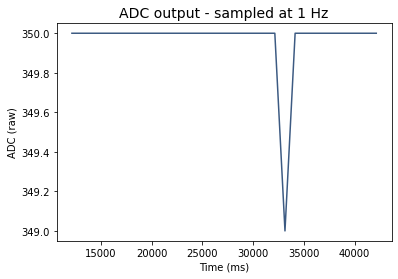

In [11]:
# Example code to visualize the output in Python. 
# You can change the path to your file and run the code directly

import pylab as pl
import matplotlib.pyplot as plt

file_path = './_Resources/data/L2.1-1Hz-9600bps.csv'

raw = pl.loadtxt(file_path, delimiter=',')

timestamps = raw[:, 0]
raw_adc = raw[:, 1]

color_palette=['#3C5A82', '#96C2D7', '#E0FAFA', '#EF6D4A', '#293140']  

plt.title('ADC output - sampled at 1 Hz', {'size':14})
plt.xlabel('Time (ms)')
plt.ylabel('ADC (raw)')
plt.plot(timestamps, raw_adc, color=color_palette[0])
plt.show()

**4.** With the sampling rate on your firmware set to 100Hz and the serial port baud rate to 300bps, start the data acquisition and stop it after a couple of seconds. Derive the sampling period from the experimental data, and comment the results using statistical metrics to support your discussion. Repeat the experiment for a baud rate of 115200bps.

## <span style="color:#484848;"> 3.2. Beyond the Lab </span>

_(This section is not mandatory and will not influence the evaluation of the lab. These are suplementary exercises designed for those who wish to explore and learn more about Arduino-based systems.)_

Consider the Analog Devices TMP36 temperature (`TMP`) sensor represented in the following figure. Assemble the circuit on a breadboard, powering it from your Seeeduino, and connect the analog output to an analog input of your choice. Expand the firmware to, in addition to the data already sent, sample and stream also the `TMP` sensor data. With the sampling rate on your firmware set to 100Hz and the baud rate set to 9600bps, compare how sending the `TMP` data as raw ADC digital codes and as ºC affects the execution time.

The measurement range for the Analog Devices TMP36 sensor used in this assembly is [-40; 125]ºC, has an offset of 0.5V (the sensor outputs 0.5V when it's at 0ºC), and the scale factor is 10mV/ºC [(datasheet)](https://www.analog.com/media/en/technical-documentation/data-sheets/TMP35_36_37.pdf ).

<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/A.Signal_Acquisition_IMG/a013/Setup TMP36.png?raw=true" width="600" border="0">
<p style="color:#484848;text-align:center"> <i> Figure 7: TMP36 sensor. GND: 0V; 3V3: 3.3V power supply; A: Analog output. </i> </p>
                        
> ⚠️ **WARNING:** BE CAREFUL when connecting the temperature sensor to the breadboard; it has a specific position and CAN BE DAMAGED IF WRONGLY CONNECTED. <b>Triple check</b> your wiring before powering up the system, and check if the sensor is overheating.


***

![scientisst-notebooks_bottom-banner](https://raw.githubusercontent.com/scientisst/notebooks/master/_Resources/bottom-banner.png)